# Linear Regression ML Implementation

## Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# to be able to create and visualise graphs in Jupyter Notebook
%matplotlib inline

: 

## Import Dataset

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

: 

## Convert Dataset to useable format


In [ ]:
dataset = pd.DataFrame(data,columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])


: 

In [ ]:
dataset

: 

In [ ]:
dataset["Price"] = target

: 

In [ ]:
dataset.head()

: 

## Preliminary Data Analysis

In [ ]:
dataset.info()

: 

In [ ]:
dataset.describe()

: 

In [ ]:
dataset.isnull().sum()

: 

## Exploratory Data Analysis (EDA)

In [ ]:
dataset.corr()

: 

In [ ]:
import seaborn as sns
sns.pairplot(dataset)

: 

In [ ]:
plt.scatter(dataset["CRIM"],dataset["Price"])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

: 

In [ ]:
plt.scatter(dataset["RM"],dataset["Price"])
plt.xlabel("Avg no. of rooms")
plt.ylabel("Price")

: 

In [ ]:
sns.regplot(x="RM",y="Price",data=dataset)

: 

In [ ]:
sns.regplot(x="LSTAT",y="Price",data=dataset)

: 

In [ ]:
sns.regplot(x="CHAS",y="Price",data=dataset)

: 

In [ ]:
sns.regplot(x="PTRATIO",y="Price",data=dataset)

: 

## Preprocessing

In [ ]:
# Dividing Data into Dependent and Independent Features
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

: 

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

: 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

: 

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

: 

In [ ]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

## Model Training


In [22]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [23]:
regression.fit(X_train,y_train)

LinearRegression()

In [24]:
# Coefficients of each feature and the intercept
print(regression.coef_)
print(regression.intercept_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]
23.01581920903955


In [25]:
# Parameters on which model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [26]:
reg_pred=regression.predict(X_test)

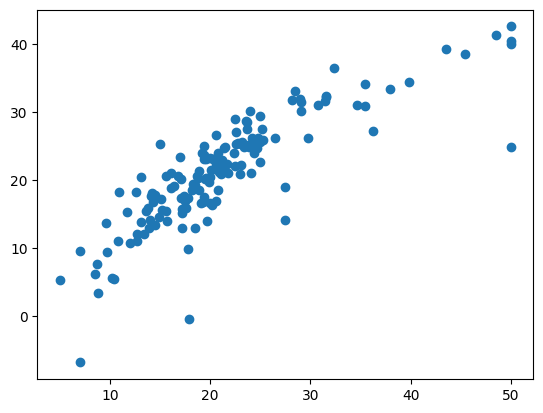

In [27]:
plt.scatter(y_test,reg_pred)

In [28]:
residuals=y_test-reg_pred
residuals

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: Price, Length: 152, dtype: float64

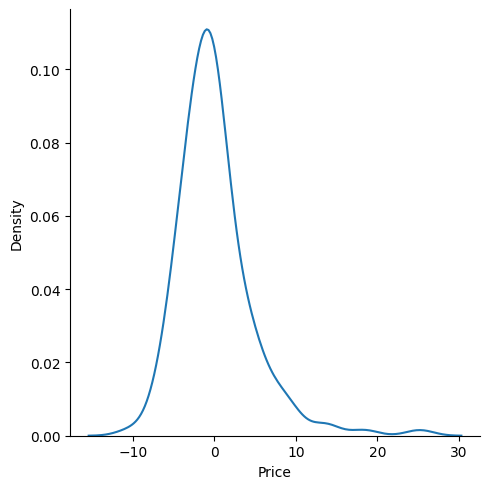

In [29]:
sns.displot(residuals,kind="kde")

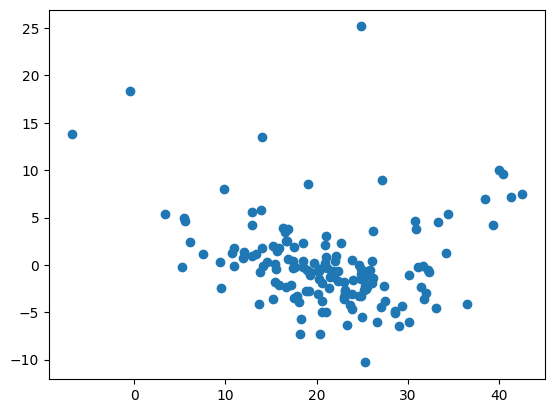

In [30]:
plt.scatter(reg_pred,residuals)

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.1627098714574053
21.51744423117721
4.6386899261728205


In [32]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.7112260057484932


In [35]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6840226584639308

## Pickling the model file for deployment

In [37]:
import pickle
pickle.dump(regression,open("regmodel.pkl",'wb'))
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [39]:
pickled_model.predict(scaler.transform(data[0].reshape(1,-1)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])